In [40]:
!pip install opencv-python

In [1]:
import os
import cv2
import numpy as np

In [2]:
data_dir = "/kaggle//input//brain-mri-images-for-brain-tumor-detection"

In [3]:
preprocessed_images = []

In [4]:
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if file.endswith('.jpg') or file.endswith('.png'):
                img = cv2.imread(file_path)
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
                preprocessed_images.append(img)
                
preprocessed_images = np.array(preprocessed_images)


In [5]:
preprocessed_images

array([[[[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]],

        [[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627]],

        [[0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         ...,
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627],
         [0.01568627, 0.01568627, 0.01568627]],

        ...,

        [[0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]

In [6]:
def extract_color_features(image):
    mean_value = np.mean(image)
    std_value = np.std(image)
    color_features = np.array([mean_value, std_value])
    
    return color_features

In [7]:
def extract_shape_features(image):
    if len(image.shape) > 2 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    _, binary_image = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)
    binary_image = np.uint8(binary_image)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    shape_features = []
    
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        area = cv2.contourArea(contour)
        if len(contour) >= 5:
            _, (major_axis, minor_axis), _ = cv2.fitEllipse(contour)
            circularity = (4 * np.pi * area) / (perimeter ** 2)
            eccentricity = major_axis / minor_axis
        else:
            circularity = -1
            eccentricity = -1
        shape_features.append([perimeter, area, circularity, eccentricity])
    
    shape_features = np.array(shape_features)
    return shape_features

In [8]:
color_features = extract_color_features(preprocessed_images)
color_features

array([0.23666226, 0.23713535])

In [9]:
shape_features_list = []

for image in preprocessed_images:
    image = (image * 255).astype(np.uint8)
    shape_features = extract_shape_features(image)
    shape_features_list.append(shape_features)

In [10]:
shape_features_list[:3]

[array([[ 3.01823375e+02,  2.15000000e+02,  2.96580493e-02,
          2.30751116e-01],
        [ 1.91923880e+02,  1.44500000e+02,  4.92969079e-02,
          4.72225291e-01],
        [ 1.24852812e+01,  3.00000000e+00,  2.41843523e-01,
          2.21752907e-01],
        [ 1.30710677e+01,  2.50000000e+00,  1.83877142e-01,
          2.46468409e-01],
        [ 2.82842708e+00,  0.00000000e+00, -1.00000000e+00,
         -1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
         -1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
         -1.00000000e+00],
        [ 1.90710677e+01,  6.50000000e+00,  2.24581100e-01,
          2.50797541e-01],
        [ 9.41421354e+00,  5.50000000e+00,  7.79838125e-01,
          7.47688142e-01],
        [ 2.00000000e+00,  0.00000000e+00, -1.00000000e+00,
         -1.00000000e+00],
        [ 8.82842708e+00,  1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00]]),
 array([[ 0.        ,  0.        , -1.   

In [11]:
print("Image Shape:", preprocessed_images.shape)
print("Image Data Type:", preprocessed_images.dtype)

Image Shape: (173, 128, 128, 3)
Image Data Type: float64


In [12]:
!pip install scipy

In [13]:
from scipy.stats import skew, kurtosis, entropy

In [14]:
def calculate_stats_and_entropy(images):
    stats_and_entropy = []

    for image in images:
        if len(image.shape) > 2 and image.shape[2] == 3:
            image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2GRAY)
        elif image.dtype != np.uint8:
            image = image.astype(np.uint8)
        mean_intensity = np.mean(image)
        std_deviation = np.std(image)
        skewness_value = skew(image.flatten())
        kurtosis_value = kurtosis(image.flatten())
        image_entropy = entropy(image)
        stats_and_entropy.append([mean_intensity, std_deviation, skewness_value, kurtosis_value, image_entropy])

    return np.array(stats_and_entropy)

stats_and_entropy_list = calculate_stats_and_entropy(preprocessed_images)

/opt/conda/lib/python3.10/site-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/tmp/ipykernel_32/3380867372.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(stats_and_entropy)


In [15]:
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    sift_features_list = []

    for image in images:
        if len(image.shape) > 2 and image.shape[2] == 3:
            image = image.astype(np.uint8)  
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray_image = image.astype(np.uint8)  

        keypoints, descriptors = sift.detectAndCompute(gray_image, None)
        
        sift_features_list.append(descriptors)

    return sift_features_list

sift_features_list = extract_sift_features(preprocessed_images)

In [16]:
sift_features_list[:5]

[None, None, None, None, None]

In [17]:
from skimage.measure import shannon_entropy

def fractal_dimension(image):
    if len(image.shape) > 2 and image.shape[2] == 3:
        gray_image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image.astype(np.uint8)
    threshold_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)[1]
    contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    perimeter = sum([cv2.arcLength(cnt, True) for cnt in contours])
    fractal_dimension = 2 * np.log(perimeter) / np.log(1.0 / 2.0)

    return fractal_dimension

fractal_dimensions = []

for image in preprocessed_images:
    fd = fractal_dimension(image)
    fractal_dimensions.append(fd)
image_entropies = [shannon_entropy(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2GRAY)) for image in preprocessed_images]

fractal_dimensions = []
image_entropies = []

for image in preprocessed_images:
    fd = fractal_dimension(image)
    fractal_dimensions.append(fd)
    
    entropy_value = shannon_entropy(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2GRAY))
    image_entropies.append(entropy_value)

fractal_dimensions_array = np.array(fractal_dimensions)
image_entropies_array = np.array(image_entropies)


/tmp/ipykernel_32/3818167366.py:11: RuntimeWarning: divide by zero encountered in log
  fractal_dimension = 2 * np.log(perimeter) / np.log(1.0 / 2.0)


In [18]:
stats_and_entropy_list = np.array(stats_and_entropy_list)

In [19]:
shape_features_list = np.array(shape_features_list)

/tmp/ipykernel_32/3734777644.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  shape_features_list = np.array(shape_features_list)


In [20]:
color_features = np.array(color_features)

In [21]:
def flatten(arr):
    return arr.flatten()
# preprocessed_images_flat = [image.reshape(-1) for image in preprocessed_images]

In [22]:
# image_entropies = np.array(image_entropies) 

In [23]:
# image_entropies = image_entropies.reshape(-1,1)

In [24]:
shape_features_list_1d = [item for sublist in shape_features_list for item in sublist]
# color_features_1d = [item for sublist in color_features for item in sublist]
stats_and_entropy_list_1d = [item for sublist in stats_and_entropy_list for item in sublist]
color_features_str = [str(item) for item in color_features]
preprocessed_images_1d = flatten(preprocessed_images)

max_length = max(
    len(preprocessed_images_1d),
    len(shape_features_list_1d),
    len(color_features_str),
    len(fractal_dimensions),
    len(image_entropies),
    len(stats_and_entropy_list_1d)
)
def pad_or_truncate(arr, length):
    if len(arr) < length:
        padding = [0] * (length - len(arr))
        arr = arr + padding
    elif len(arr) > length:
        arr = arr[:length]
    return arr

preprocessed_images = pad_or_truncate(preprocessed_images_1d, max_length)
shape_features_list = pad_or_truncate(shape_features_list_1d, max_length)
color_features = pad_or_truncate(color_features_str, max_length)
fractal_dimensions = pad_or_truncate(fractal_dimensions, max_length)
image_entropies = pad_or_truncate(image_entropies, max_length)
stats_and_entropy_list = pad_or_truncate(stats_and_entropy_list_1d, max_length)

data = {
    'Preprocessed_images': preprocessed_images,
    'Shape Features': shape_features_list,
    'Color Features': color_features,
    'Fractal_Dimension': fractal_dimensions,
    'Image_Entropy': image_entropies,
    'Stats&Entropy': stats_and_entropy_list
}

In [25]:
import pandas as pd
df = pd.DataFrame(data)

In [26]:
df.head(7)

,Preprocessed_images,Shape Features,Color Features,Fractal_Dimension,Image_Entropy,Stats&Entropy
0,0.015686,"[301.82337486743927, 215.0, 0.0296580492568106...",0.23666226025536358,inf,0.000000,0.0
1,0.015686,"[191.92388033866882, 144.5, 0.0492969079397363...",0.23713535420994242,inf,0.000000,0.0
2,0.015686,"[12.485281229019165, 3.0, 0.24184352278519608,...",0,inf,0.044985,NaN
3,0.015686,"[13.071067690849304, 2.5, 0.18387714214051473,...",0,inf,0.001763,NaN
4,0.015686,"[2.8284270763397217, 0.0, -1.0, -1.0]",0,inf,0.000000,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
5,0.015686,"[0.0, 0.0, -1.0, -1.0]",0,inf,0.004709,0.0
6,0.015686,"[0.0, 0.0, -1.0, -1.0]",0,inf,0.000000,0.0


In [27]:
df.info

<bound method DataFrame.info of          Preprocessed_images  \
0                   0.015686   
1                   0.015686   
2                   0.015686   
3                   0.015686   
4                   0.015686   
...                      ...   
8503291             0.000000   
8503292             0.000000   
8503293             0.000000   
8503294             0.000000   
8503295             0.000000   

                                            Shape Features  \
0        [301.82337486743927, 215.0, 0.0296580492568106...   
1        [191.92388033866882, 144.5, 0.0492969079397363...   
2        [12.485281229019165, 3.0, 0.24184352278519608,...   
3        [13.071067690849304, 2.5, 0.18387714214051473,...   
4                    [2.8284270763397217, 0.0, -1.0, -1.0]   
...                                                    ...   
8503291                                                  0   
8503292                                                  0   
8503293                  

### Preprocessing

In [161]:
# import pandas as pd
# import numpy as np
# from skimage import io, transform, color
# from scipy import ndimage

# target_size = (128, 128)
# def preprocess_image(image):
#     img = io.imread(image)
#     img = transform.resize(img, target_size, mode='constant')
#     if len(img.shape) > 2 and img.shape[2] == 3:
#         img = color.rgb2gray(img)
#     img = img / 255.0
#     img = ndimage.gaussian_filter(img, sigma=1)

#     return img
# df['Preprocessed_images'] = df['Preprocessed_images'].apply(preprocess_image)


In [28]:
df['Fractal_Dimension'] = df['Fractal_Dimension'].replace('inf', 1.0).astype(float)

df['Stats&Entropy'] = df['Stats&Entropy'].apply(lambda x: np.nan if not isinstance(x, (int, float)) else x)


In [163]:
df.head()

,Preprocessed_images,Shape Features,Color Features,Fractal_Dimension,Image_Entropy,Stats&Entropy
0,0.015686,"[301.82337486743927, 215.0, 0.0296580492568106...",0.23666226025536358,inf,0.000000,0.0
1,0.015686,"[191.92388033866882, 144.5, 0.0492969079397363...",0.23713535420994242,inf,0.000000,0.0
2,0.015686,"[12.485281229019165, 3.0, 0.24184352278519608,...",0,inf,0.044985,NaN
3,0.015686,"[13.071067690849304, 2.5, 0.18387714214051473,...",0,inf,0.001763,NaN
4,0.015686,"[2.8284270763397217, 0.0, -1.0, -1.0]",0,inf,0.000000,NaN


In [29]:
df['Shape Features'] = df['Shape Features'].apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)
df['Stats&Entropy'] = df['Stats&Entropy'].astype(float)


In [30]:
df.head()

,Preprocessed_images,Shape Features,Color Features,Fractal_Dimension,Image_Entropy,Stats&Entropy
0,0.015686,"[301.82337486743927, 215.0, 0.0296580492568106...",0.23666226025536358,inf,0.000000,0.0
1,0.015686,"[191.92388033866882, 144.5, 0.0492969079397363...",0.23713535420994242,inf,0.000000,0.0
2,0.015686,"[12.485281229019165, 3.0, 0.24184352278519608,...",0,inf,0.044985,NaN
3,0.015686,"[13.071067690849304, 2.5, 0.18387714214051473,...",0,inf,0.001763,NaN
4,0.015686,"[2.8284270763397217, 0.0, -1.0, -1.0]",0,inf,0.000000,NaN


In [166]:
df.isnull().sum()

Preprocessed_images      0
Shape Features           0
Color Features           0
Fractal_Dimension        0
Image_Entropy            0
Stats&Entropy          341
dtype: int64

In [31]:
mean_stats_entropy = df['Stats&Entropy'].mean()
df['Stats&Entropy'].fillna(mean_stats_entropy, inplace=True)

In [32]:
df.isnull().sum()

Preprocessed_images    0
Shape Features         0
Color Features         0
Fractal_Dimension      0
Image_Entropy          0
Stats&Entropy          0
dtype: int64

In [70]:
df.head()

,Preprocessed_images,Shape Features,Color Features,Fractal_Dimension,Image_Entropy,Stats&Entropy
0,0.015686,"[301.82337486743927, 215.0, 0.0296580492568106...",0.23666226025536358,inf,0.000000,0.0
1,0.015686,"[191.92388033866882, 144.5, 0.0492969079397363...",0.23713535420994242,inf,0.000000,0.0
2,0.015686,"[12.485281229019165, 3.0, 0.24184352278519608,...",0,inf,0.044985,NaN
3,0.015686,"[13.071067690849304, 2.5, 0.18387714214051473,...",0,inf,0.001763,NaN
4,0.015686,"[2.8284270763397217, 0.0, -1.0, -1.0]",0,inf,0.000000,NaN


### Clustering

In [33]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler

In [167]:
# def preprocess_stats_entropy(x):
#     try:
#         values = eval(x)
#         if isinstance(values, list):
#             values = [float(val) for val in values if not np.isnan(val)]
#             if values:
#                 return np.mean(values)
#     except (SyntaxError, TypeError):
#         pass
#     return np.nan

# df['Stats&Entropy'] = df['Stats&Entropy'].apply(preprocess_stats_entropy)

# selected_features = ['Stats&Entropy']
# X = df[selected_features]
# X = X.dropna()

# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)

# epsilon = 0.5  
# min_samples = 5  
# dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
# cluster_labels = dbscan.fit_predict(X_std)

# df = df.loc[X.index]
# df['Cluster_Labels'] = cluster_labels

In [31]:
column_data = df['Image_Entropy'].values

In [32]:
reshaped_column = np.array(df['Image_Entropy'].values.tolist()).reshape(-1, 1)

In [33]:
reshaped_column.shape

(8503296, 1)

In [34]:
new_df = pd.DataFrame(reshaped_column, columns=['Image_Entropy'])

In [35]:
new_df['Image_Entropy'].shape

(8503296,)

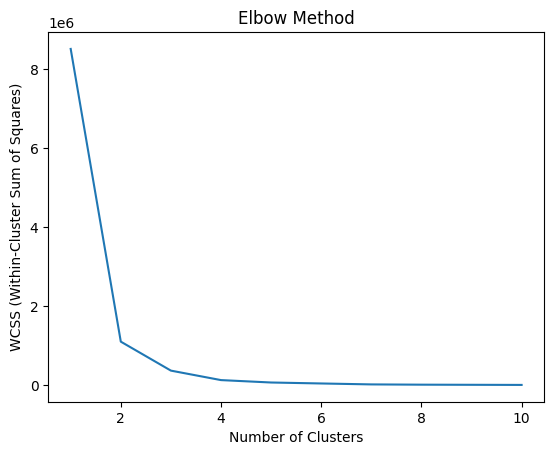

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# def preprocess_stats_entropy(x):
#     try:
#         values = eval(x)
#         if isinstance(values, list):
#             values = [float(val) for val in values if not np.isnan(val)]
#             if values:
#                 return np.mean(values)
#     except (SyntaxError, TypeError):
#         pass
#     return np.nan

# df['Stats&Entropy'] = df['Stats&Entropy'].apply(preprocess_stats_entropy)


selected_features = ['Shape Features', 'Color Features', 'Fractal_Dimension', 'Image_Entropy']
df_1 = df.dropna(subset=selected_features)
scaler = StandardScaler()
X = scaler.fit_transform(reshaped_column)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# num_clusters = 3
# kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
# cluster_labels = kmeans.fit_predict(X)
# df['Cluster_Labels'] = cluster_labels


In [37]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)


In [38]:
cluster_labels = kmeans.fit_predict(X)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
df['Cluster_Labels'] = cluster_labels

In [44]:
image_entropies = np.array(image_entropies)
image_entropies = image_entropies.reshape(-1,1)

In [45]:
segmented_masks = image_entropies

In [50]:
segmented_masks

array([[0.        ],
       [0.        ],
       [0.04498542],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [43]:
df['Cluster_Labels']

0          0
1          0
2          0
3          0
4          0
          ..
8503291    0
8503292    0
8503293    0
8503294    0
8503295    0
Name: Cluster_Labels, Length: 8503296, dtype: int32

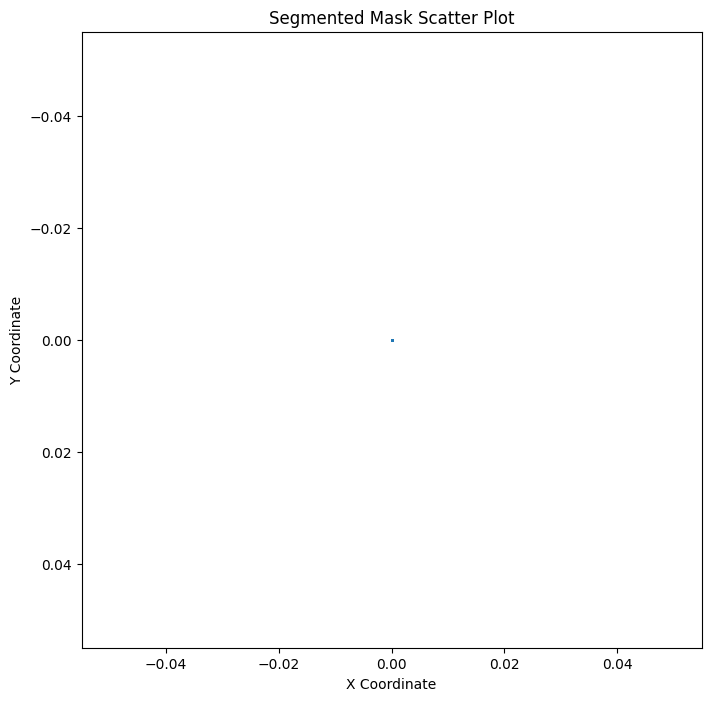

In [55]:
for mask in segmented_masks:
    non_zero_indices = np.where(mask > 0)
    x_coords = non_zero_indices[0] 
    y_coords = np.zeros_like(x_coords)
    scatter_points.extend(list(zip(x_coords, y_coords)))

scatter_points = np.array(scatter_points)

# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(scatter_points[:, 0], scatter_points[:, 1], s=1) 
plt.title("Segmented Mask Scatter Plot")
plt.gca().invert_yaxis()
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()